# Advanced Regression Assignment
By Wasim Khan

### Problem statements:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

__The company wants to know:__

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


__Business Goal:__

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

__The steps we will follow to solve this problem are:__

    1. Data understanding
    2. Data cleaning
    3. Data Preparation and EDA
    4. Model building
    5. Model evaluation

##### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing libraries for modelling
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1 : Data understanding

##### Importing the dataset

In [4]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

Data set has 1460 rows and 81 columns

In [6]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Getting details related to numeric data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Checking null values in the dataset
nullvalues = data.isnull().sum()
print(nullvalues[nullvalues > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
#Checking the percentage of missing values
percentnullvalues = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
print(percentnullvalues[percentnullvalues > 0])

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


It is observerd that **PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage** have higher number of null values and these columns can be removed.

## Step 2. Data Cleaning

##### Dropping missing values

In [10]:
#dropping PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage which have high Null values
data = data.drop(data[percentnullvalues.loc[percentnullvalues > 10].index], axis=1)

In [11]:
#Null sanity check
percentnullvalues = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
print(percentnullvalues[percentnullvalues > 0])

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


In [12]:
data.shape

(1460, 75)

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


##### Imputing missing values

It is observed that certain columns have NA values

In [14]:
#Checking for columns with NA values
navalues = data.isna().sum().sort_values(ascending=False)
print(navalues[navalues > 0])

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64


In [15]:
data['GarageType'].fillna('Attchd', inplace = True)
data['GarageYrBlt'].fillna(0, inplace = True)
data['GarageFinish'].fillna('Unf', inplace = True)
data['GarageCond'].fillna('TA', inplace = True)
data['GarageQual'].fillna('TA', inplace = True)
data['BsmtExposure'].fillna('No', inplace = True)
data['BsmtFinType2'].fillna('Unf', inplace = True)
data['BsmtFinType1'].fillna('Unf', inplace = True)
data['BsmtCond'].fillna('TA', inplace = True)
data['BsmtQual'].fillna('TA', inplace = True)
data['MasVnrType'].fillna('None', inplace = True)
data['MasVnrArea'].fillna(data.MasVnrArea.mean(), inplace = True)
data['Electrical'].fillna('SBrkr', inplace = True)

In [16]:
#Sanity Check
navalues = data.isna().sum().sort_values(ascending=False)
print(navalues[navalues > 0])

Series([], dtype: int64)


##### Duplicate Data and Data redundancies

Lets check for columns which almost have same values

In [17]:
uniquepercent = (data.nunique()/len(data)*100).sort_values()
print(uniquepercent)

Street             0.136986
Utilities          0.136986
CentralAir         0.136986
PavedDrive         0.205479
HalfBath           0.205479
LandSlope          0.205479
BsmtHalfBath       0.205479
GarageFinish       0.205479
KitchenQual        0.273973
FullBath           0.273973
KitchenAbvGr       0.273973
MasVnrType         0.273973
Fireplaces         0.273973
BsmtFullBath       0.273973
BsmtQual           0.273973
LandContour        0.273973
LotShape           0.273973
BsmtCond           0.273973
BsmtExposure       0.273973
ExterQual          0.273973
ExterCond          0.342466
HeatingQC          0.342466
YrSold             0.342466
BldgType           0.342466
GarageCars         0.342466
GarageQual         0.342466
LotConfig          0.342466
GarageCond         0.342466
MSZoning           0.342466
Electrical         0.342466
SaleCondition      0.410959
GarageType         0.410959
Heating            0.410959
BsmtFinType2       0.410959
BsmtFinType1       0.410959
Foundation         0

We can impute **'Street', 'Utilities'** as this columns almost have the same values and wont be required in analysis

Similarly we can also drop **ID** columns as it is of no significance in our analysis and model building

In [18]:
data = data.drop(['Street', 'Utilities','Id'],axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
data.shape

(1460, 72)

##### Sanity Check

In [20]:
#Checking for null values
percentnullvalues = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
print(percentnullvalues[percentnullvalues > 0])

Series([], dtype: float64)


In [21]:
#Checking for null values
percentnullvalues = (data.isna().sum()/len(data)*100).sort_values(ascending=False)
print(percentnullvalues[percentnullvalues > 0])

Series([], dtype: float64)


- Now, we have no null values and no NA values

- Columns which are not required are dropped from the dataset

## Step 3. Data Preparation and EDA

##### Derived metrics

We have some Years column which can be used to derive the age

In [22]:
#Method to calculate Age from Year
def convertingYearToAge(data_frame,col):
    new_cal = col + '_Old'
    data_frame[new_cal] = data_frame[col].max()-data[col]
    

In [23]:
#Converting year columns to age
#Converting the year column into age
convertingYearToAge(data,'YearBuilt')
convertingYearToAge(data,'YearRemodAdd')
convertingYearToAge(data,'GarageYrBlt')
convertingYearToAge(data,'YrSold')

In [24]:
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10,10,10.0,2


In [25]:
#Dropping Years columns as we now have the Age columns
#Let's drop the actual Year columns
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 'columns')

##### Converting Data into suitable format
As seen Data description text documnet we have encoded format for **MSSubClass**. MSSubClass variable contains numeric data which does not signifies the variable. Lets convert into string and treat it as a categorical variable

In [26]:
data.MSSubClass = data.MSSubClass.astype(str)

In [27]:
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


##### Treating Outliers

Outliers treatment with taking the lower and upper quantile ranges of 0.25 and 0.99

In [28]:
#Checking Numeric columns in dataset
data.describe().transpose().index

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old',
       'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

In [29]:
#Defining method for outliers  treatment
def dropOutliers(data_frame, numerical_columns):
    list = []
    for col in numerical_columns:
        Q1 = data_frame[col].quantile(.25)
        Q3 = data_frame[col].quantile(.99)
        IQR = Q3-Q1
        data_frame =  data_frame[(data_frame[col] >= (Q1-(1.5*IQR))) & (data_frame[col] <= (Q3+(1.5*IQR)))] 
    return data_frame

In [30]:
#Selcting numeric columns for outliers trestment
num_var = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'MiscVal','SalePrice']
data = dropOutliers(data, num_var)

In [31]:
data.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,10046.843015,6.096819,5.571231,103.061882,438.174274,45.736515,568.279391,1052.190180,1158.693638,345.793223,5.901107,1510.387967,0.422545,0.057400,1.562241,0.383817,2.863762,1.045643,6.506916,0.605118,1.768326,472.484094,93.827109,46.621024,22.066390,3.091286,14.786307,2.094744,16.939142,6.327109,180600.757953,38.695021,25.179115,140.918396,2.187414
std,5477.385111,1.381651,1.109931,179.696141,434.543869,160.269649,442.317708,417.177214,374.600616,435.498876,48.854638,513.208416,0.514714,0.238559,0.550494,0.501887,0.815151,0.218500,1.610397,0.636558,0.748419,212.592596,124.389123,66.153697,61.293686,26.294972,54.734812,35.878959,108.725898,2.710773,79368.799465,30.273842,20.661493,453.116435,1.327956
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,5.000000,5.000000,0.000000,0.000000,0.000000,224.250000,795.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129900.000000,9.250000,6.000000,9.000000,1.000000
50%,9452.500000,6.000000,5.000000,0.000000,380.500000,0.000000,480.500000,990.000000,1085.500000,0.000000,0.000000,1458.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,162900.000000,37.000000,16.000000,33.000000,2.000000
75%,11509.000000,7.000000,6.000000,163.750000,707.500000,0.000000,809.500000,1287.500000,1383.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,213497.500000,56.000000,43.000000,52.000000,3.000000
max,70761.000000,10.000000,9.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,407.000000,480.000000,738.000000,1400.000000,12.000000,755000.000000,138.000000,60.000000,2010.000000,4.000000


##### EDA Plots

In [32]:
# Method for plotting graphs based on numerical/continuous variables
def numericColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(figsize = (5,5))
    plt.figure(index)
    #sns.jointplot(x = independent_variable, y = target_variable, data = data_frame[[independent_variable,target_variable]])
    plt.scatter(data_frame[independent_variable],data_frame.SalePrice)
    plt.xlabel(independent_variable)
    plt.ylabel('SalePrice')

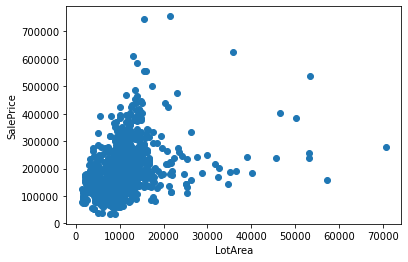

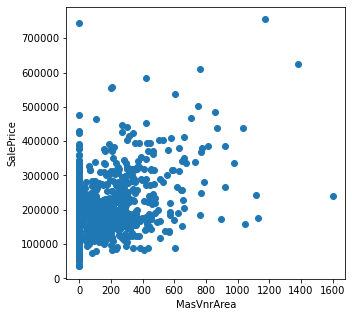

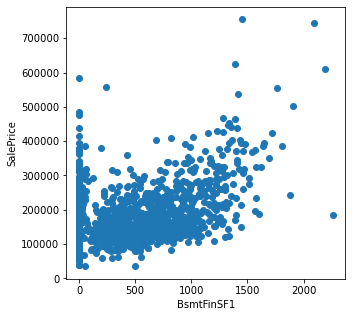

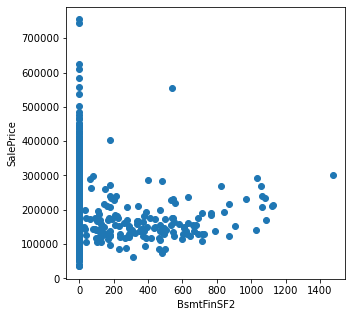

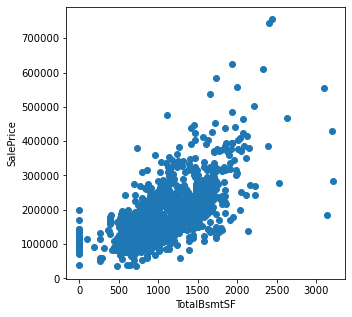

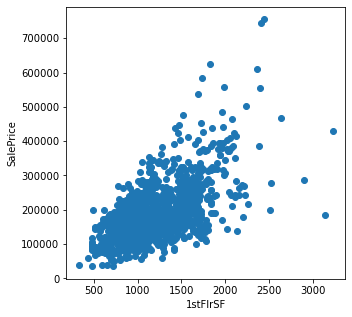

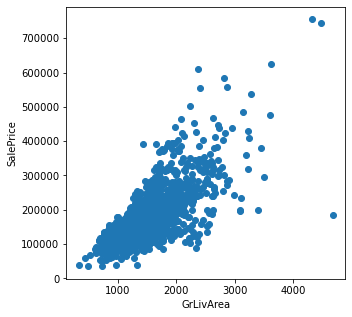

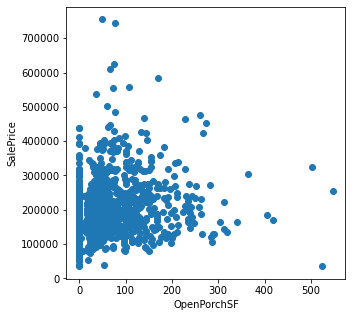

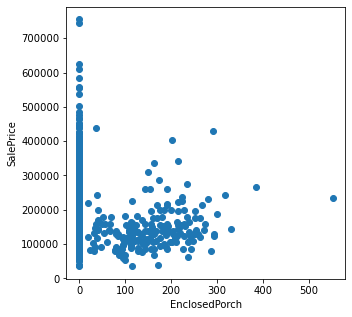

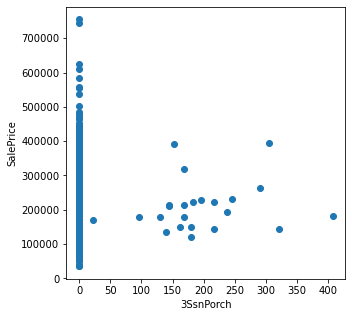

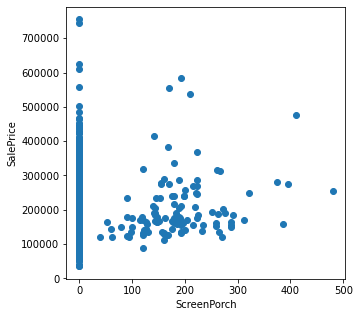

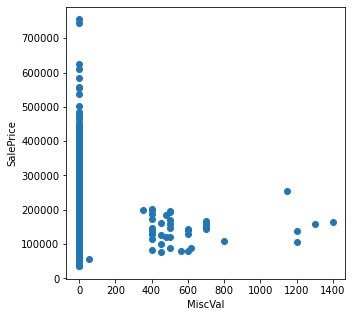

<Figure size 360x360 with 0 Axes>

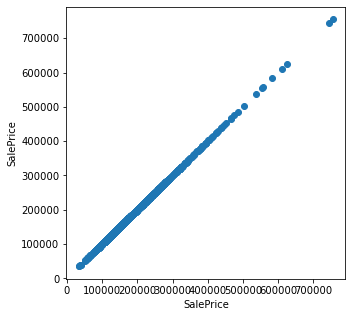

In [33]:
#Ploting Scatter plot for all numerical variables
for index, col in enumerate(num_var):
    numericColAnalysis(data, index, col, 'SalePrice')

Preparing Heatmap to understand the correlations among the numerical variables

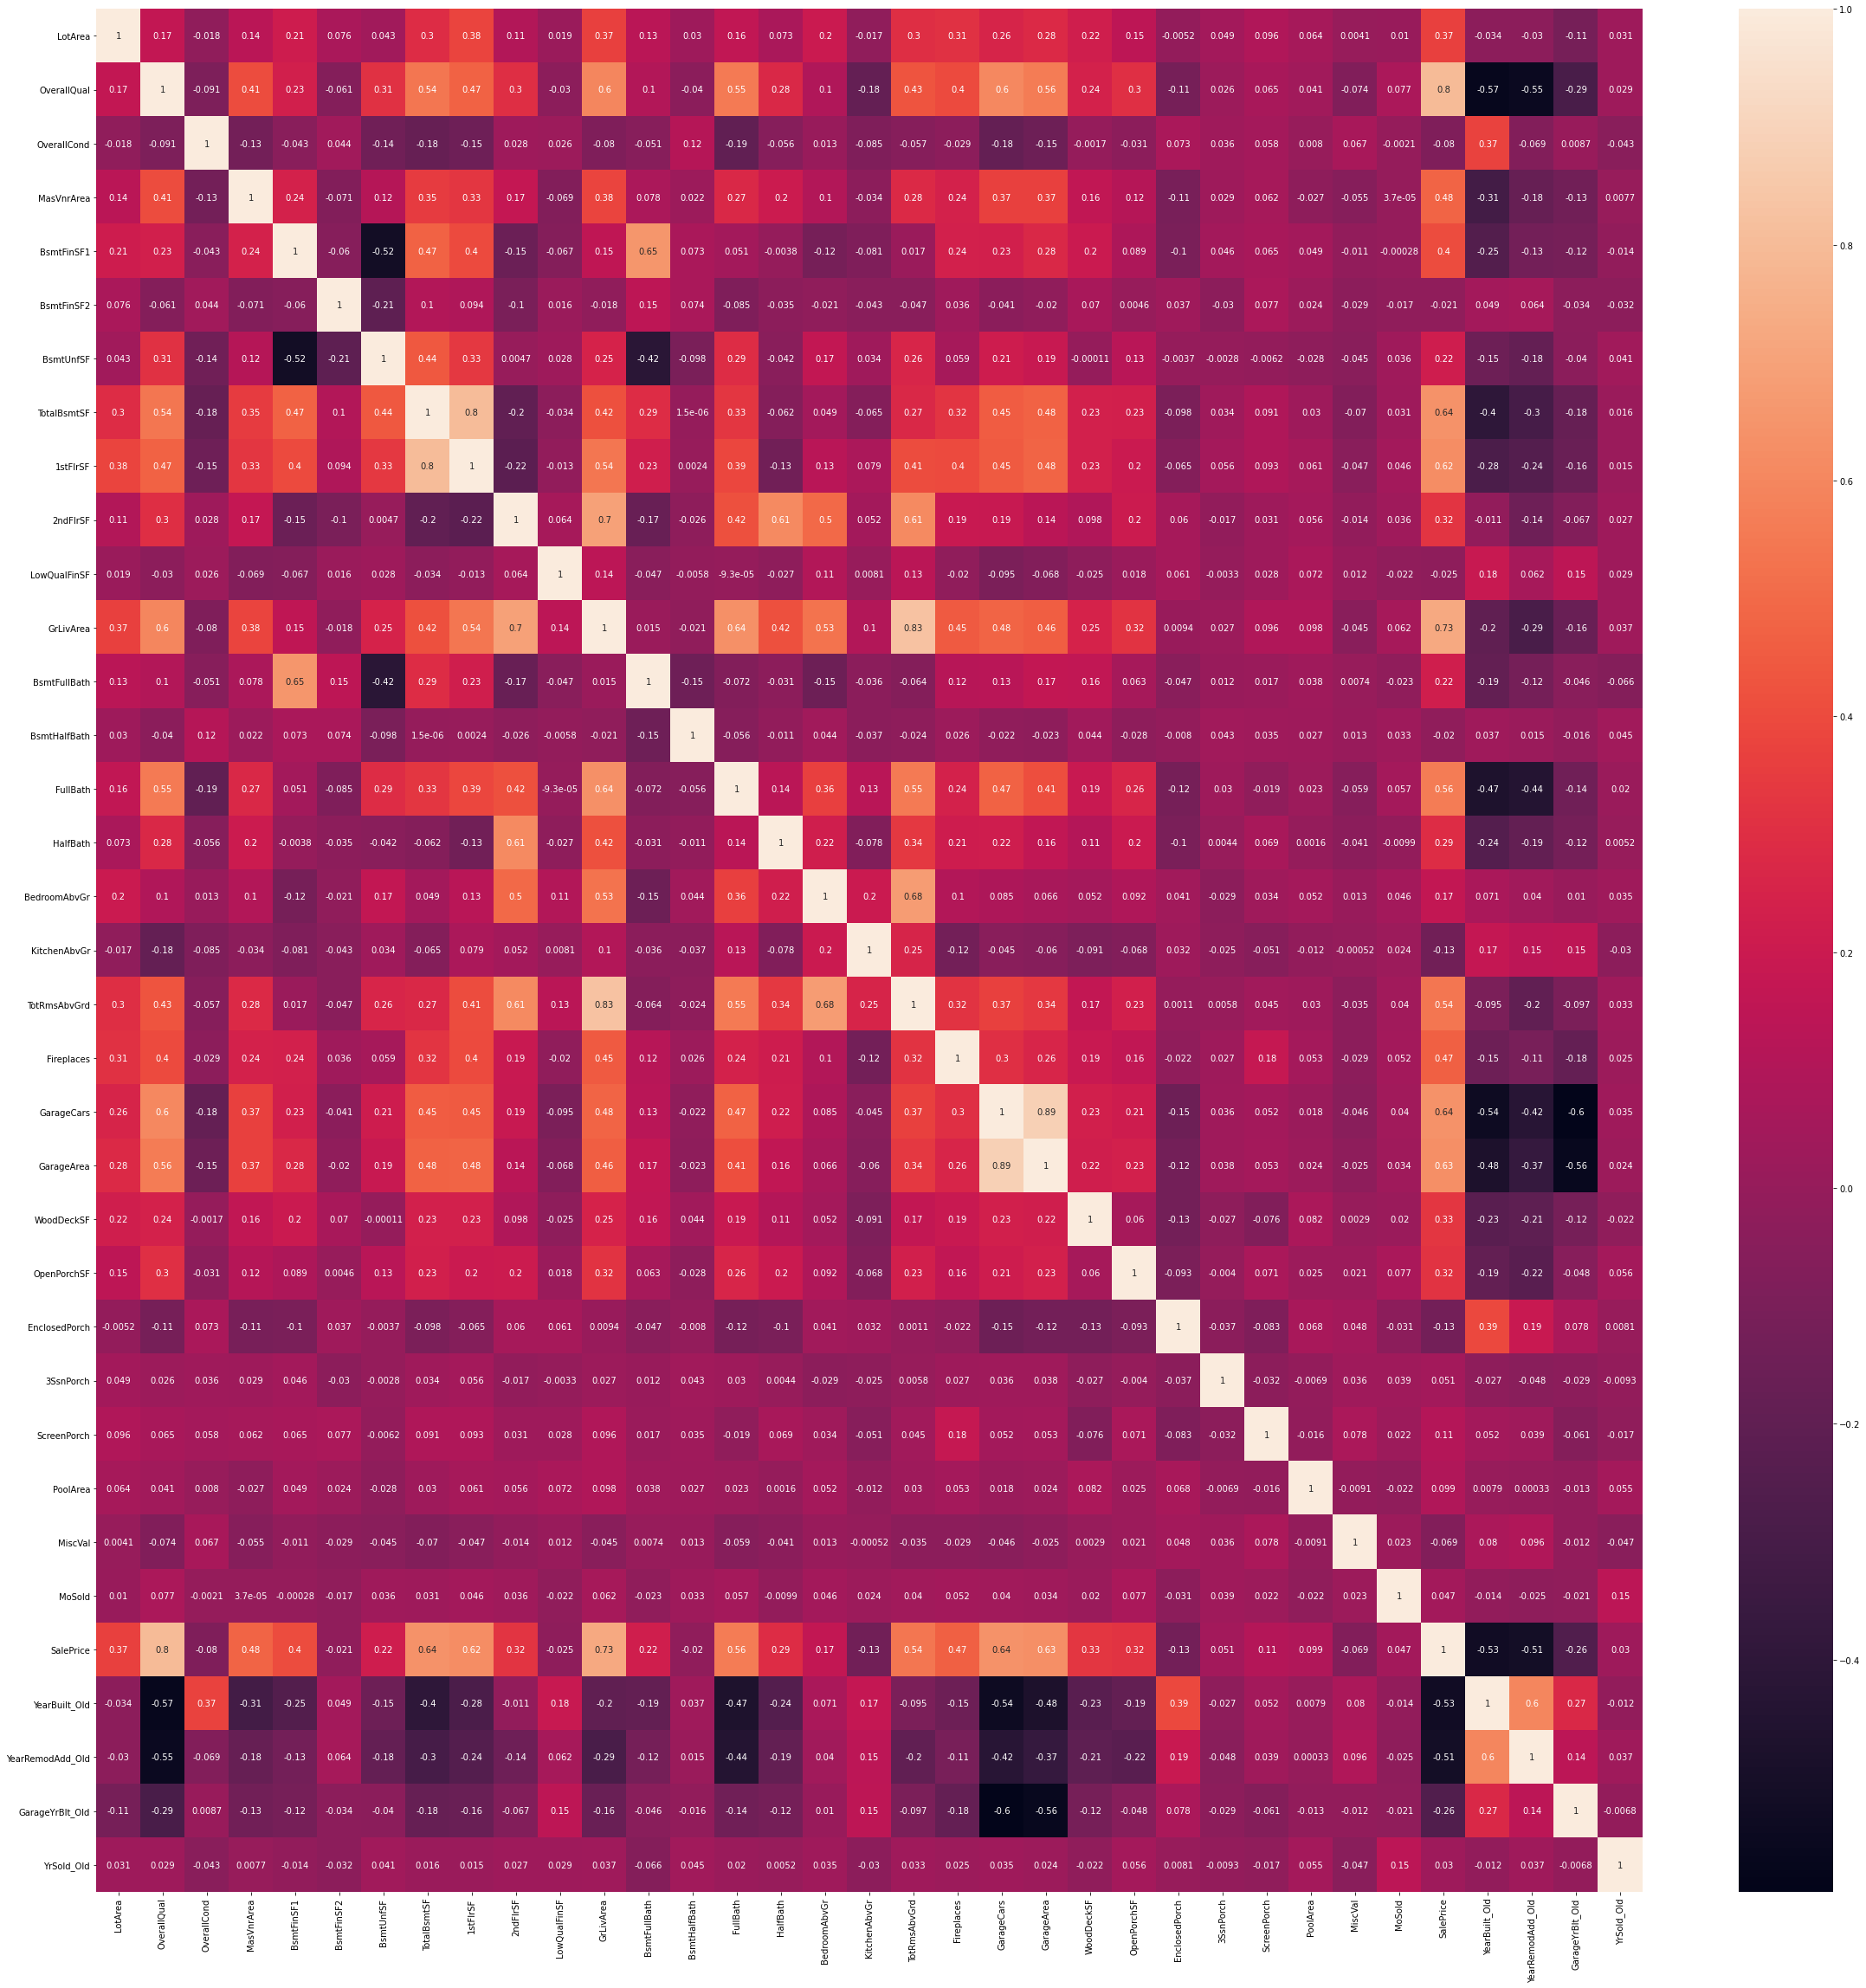

In [34]:
num_var = data.select_dtypes(include = np.number).columns.tolist()
num_var.remove('SalePrice')
plt.figure(figsize=(40,40))
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

**Observations:**<br>
1. The predictors `'GarageCars'` and `'GarageArea'` shows (0.89) strong positive correlation. Hence, dropping `'GarageCars'`.<br>
2. The predictors `'GrLivArea'` and `'TotRmsAbvGrd'` shows (0.83) strong positive correlation. Hence, dropping `'TotRmsAbvGrd'`.<br>
3. The predictors `'1stFlrSF'` and `'TotalBsmtSF'` shows (0.80) strong positive correlation. Hence, dropping `'TotalBsmtSF'`.<br>
4. The predictors `'GrLivArea'` and `'2ndFlrSF'` shows (0.70) strong positive correlation. Hence, dropping `'2ndFlrSF'`.<br>

In [35]:
##Removing the highly correlated predictors to reduce multicollinearity.
data= data.drop(['TotRmsAbvGrd', 'GarageCars', 'GrLivArea','TotalBsmtSF'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,Typ,0,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,Typ,1,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,Typ,1,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,Typ,1,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,Typ,1,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


Lets consider categorical variables

In [36]:
#Get all categorical Columns
categorical_columns = data.select_dtypes(include = np.object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',data[col].head().unique())

MSSubClass  :  ['60' '20' '70']
MSZoning  :  ['RL']
LotShape  :  ['Reg' 'IR1']
LandContour  :  ['Lvl']
LotConfig  :  ['Inside' 'FR2' 'Corner']
LandSlope  :  ['Gtl']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
Condition1  :  ['Norm' 'Feedr']
Condition2  :  ['Norm']
BldgType  :  ['1Fam']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
RoofMatl  :  ['CompShg']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
ExterQual  :  ['Gd' 'TA']
ExterCond  :  ['TA']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
BsmtQual  :  ['Gd' 'TA']
BsmtCond  :  ['TA' 'Gd']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ']
BsmtFinType2  :  ['Unf']
Heating  :  ['GasA']
HeatingQC  :  ['Ex' 'Gd']
CentralAir  :  ['Y']
Electrical  :  ['SBrkr']
KitchenQual  :  ['Gd' 'TA']
Functional  :  ['Typ']
GarageType  :  ['Attchd' 'Detchd']
GarageFinish  :  ['RFn' 'Unf']
GarageQual  :  ['TA']
GarageCond  :  ['

Plotting graphs for categorical variable

In [37]:
# Method for plotting graphs for categorical variables
def categoricalColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(index)
    variables = data_frame[[independent_variable]].nunique()
    plt.figure(figsize = (variables,variables/1.77))
    my_order = data_frame[[independent_variable,target_variable]].groupby(by = [independent_variable])[target_variable].median().sort_values(ascending=True)
    sns.boxplot(x = independent_variable, y = target_variable, data= data_frame[[independent_variable,target_variable]], order = my_order.index)

<Figure size 432x288 with 0 Axes>

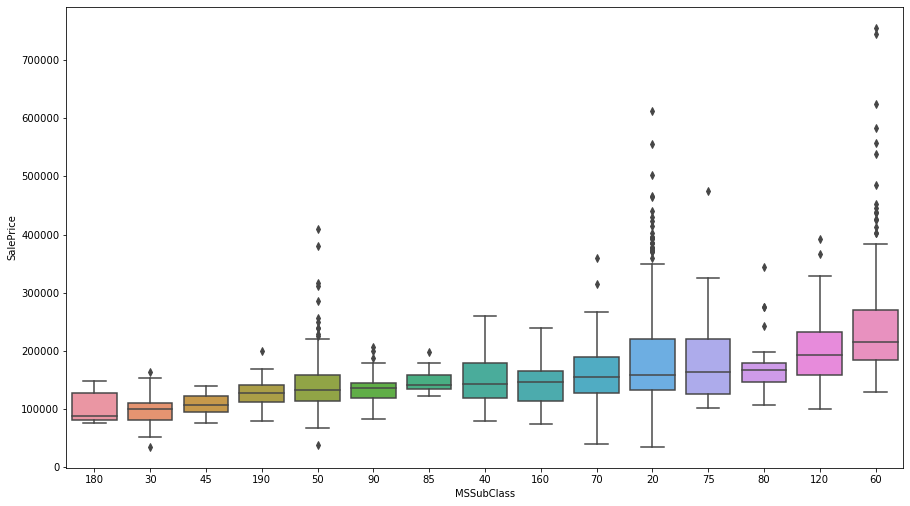

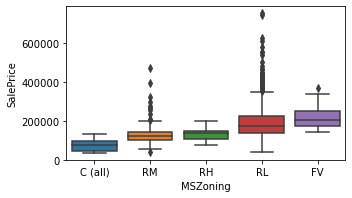

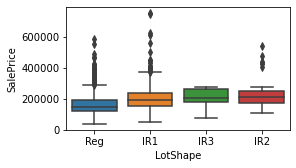

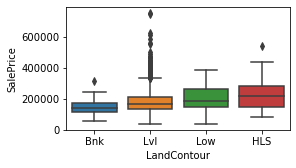

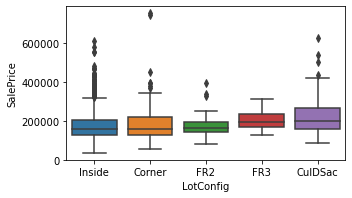

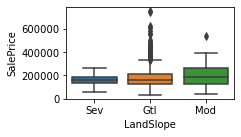

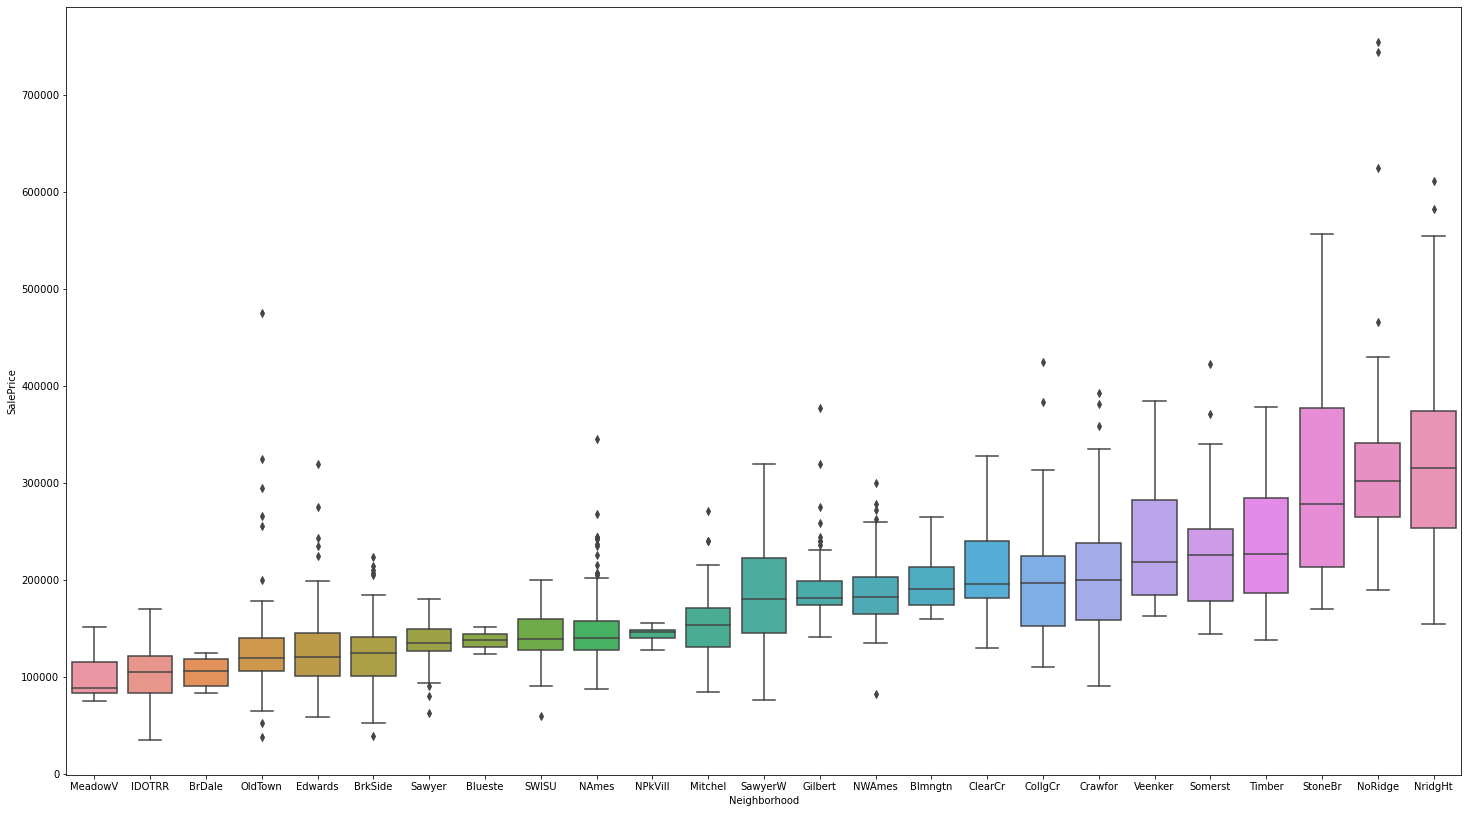

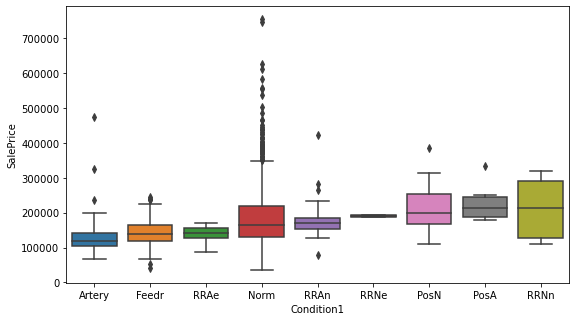

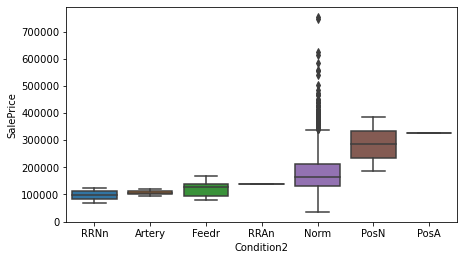

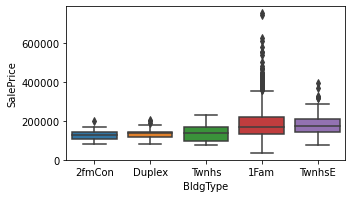

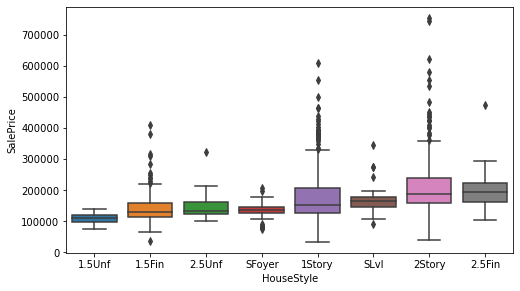

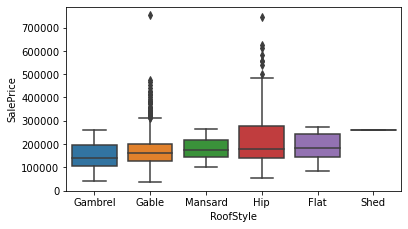

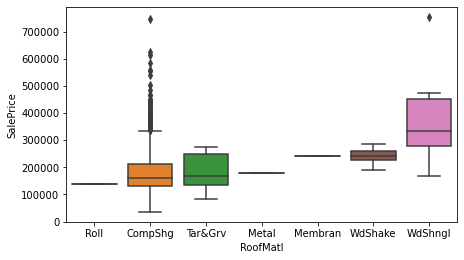

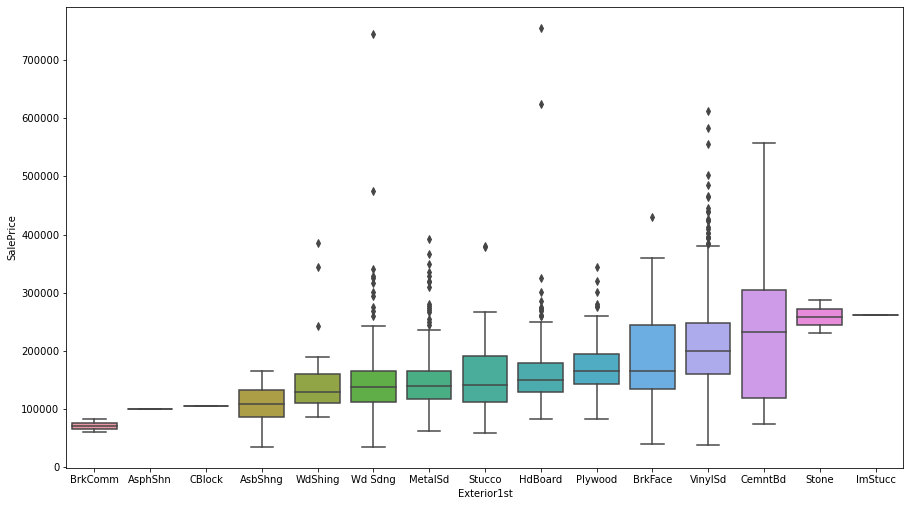

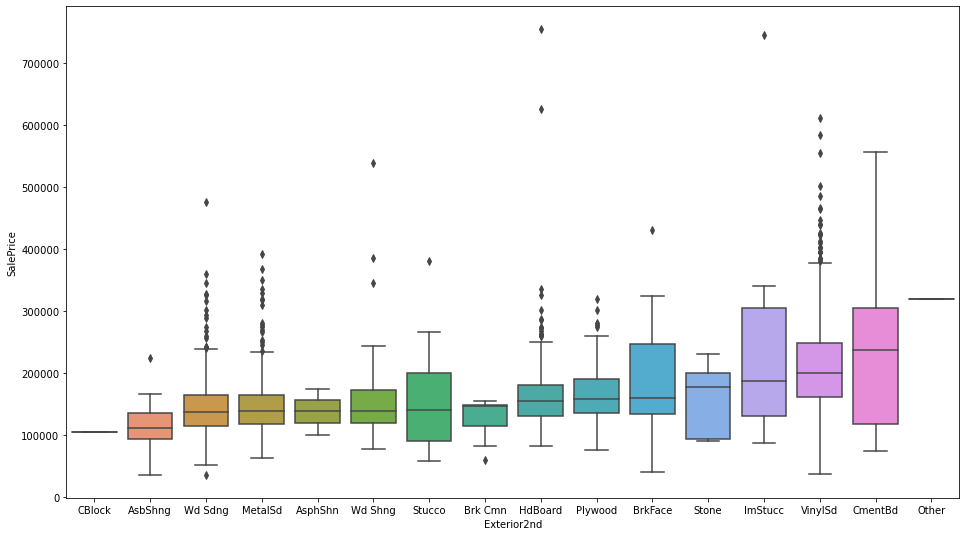

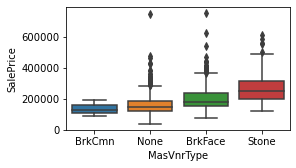

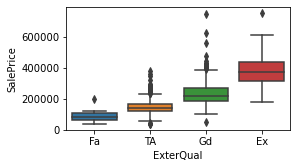

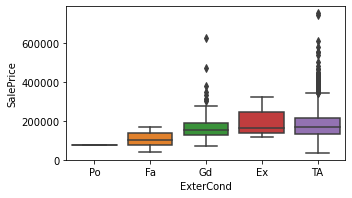

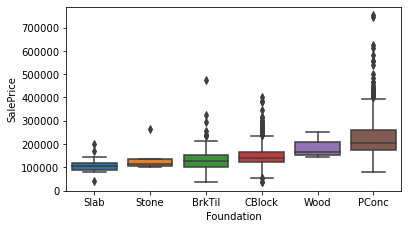

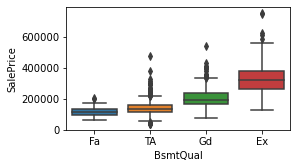

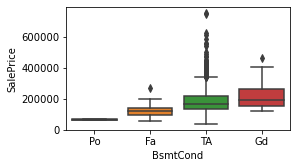

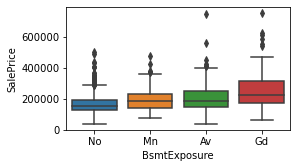

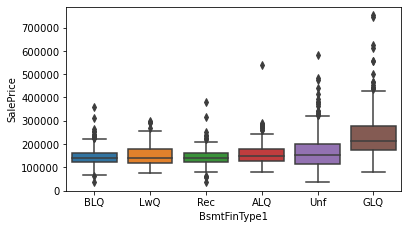

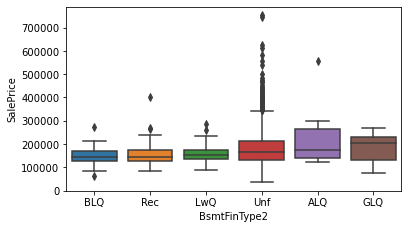

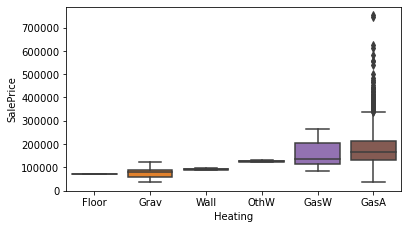

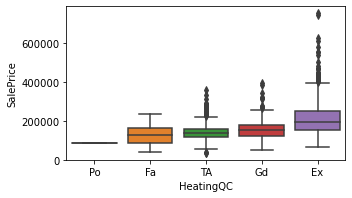

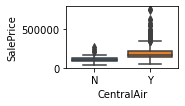

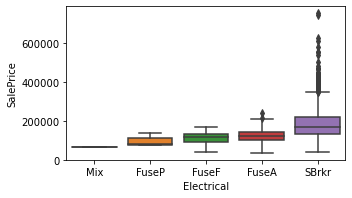

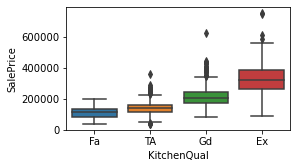

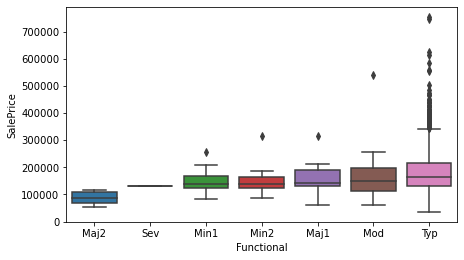

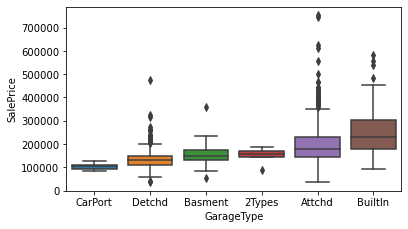

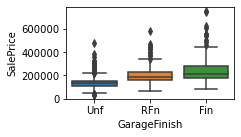

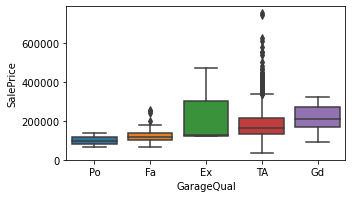

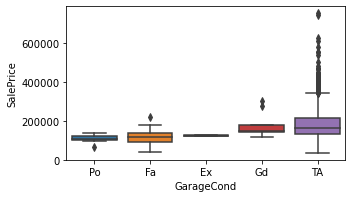

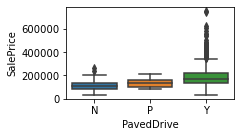

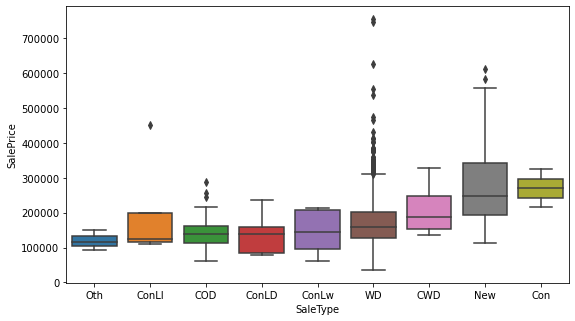

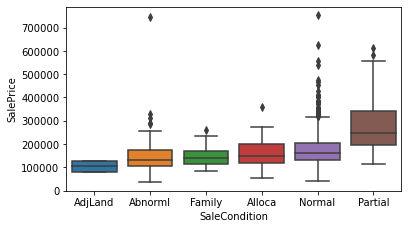

In [38]:
#Ploting the graph for all categorical variables against SalePrice
for index, col in enumerate(categorical_columns):
    categoricalColAnalysis(data, index, col, 'SalePrice')

##### Dummy variables

In [39]:
data[categorical_columns].head(20)

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,50,RL,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,20,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,60,RL,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,50,RM,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,190,RL,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


It is seen from data description that these are having some kind of order and hence we can say these are ordinal in nature.

In [40]:
ordinal_columns = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']
data[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [41]:
# Converting ordinal variable to numeric. 
data[ordinal_columns[0]] = data[ordinal_columns[0]].map({'Gtl':0,'Mod':1,'Sev':2})
data[ordinal_columns[1]] = data[ordinal_columns[1]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data[ordinal_columns[2]] = data[ordinal_columns[2]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data[ordinal_columns[3]] = data[ordinal_columns[3]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data[ordinal_columns[4]] = data[ordinal_columns[4]].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data[ordinal_columns[5]] = data[ordinal_columns[5]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data[ordinal_columns[6]] = data[ordinal_columns[6]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data[ordinal_columns[7]] = data[ordinal_columns[7]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data[ordinal_columns[8]] = data[ordinal_columns[8]].map({'N':0,'Y':1})
data[ordinal_columns[9]] = data[ordinal_columns[9]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data[ordinal_columns[10]] = data[ordinal_columns[10]].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data[ordinal_columns[11]] = data[ordinal_columns[11]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data[ordinal_columns[12]] = data[ordinal_columns[12]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data[ordinal_columns[13]] = data[ordinal_columns[13]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data[ordinal_columns[14]] = data[ordinal_columns[14]].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [42]:
data[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [43]:
#creating dummy variables for nominal variables
nominal_var = ['MSSubClass','MSZoning','LandContour','LotConfig','Neighborhood','Condition1',
                            'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st', 
                            'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional',
                            'GarageType','PavedDrive','SaleType','SaleCondition']
dummyvar = pd.get_dummies(data[nominal_var],
                           drop_first=True)

data = pd.concat([data,dummyvar],axis='columns')

data = data.drop(nominal_var,axis='columns')

In [44]:
data.head()

,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,4,1,856,854,0,1,0,2,1,3,1,3,0,2,548,3,3,0,61,0,0,0,0,0,2,208500,7,7,7.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,4,1,1262,0,0,0,1,2,0,3,1,2,1,2,460,3,3,298,0,0,0,0,0,0,5,181500,34,34,34.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

##### Split dataset into train and test for modeling

In [45]:
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 50)

In [46]:
df_test

,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1145,6240,3,0,5,6,0.0,2,2,3,3,1,1,0,1,0,1042,4,1,1042,534,0,0,0,1,0,3,1,2,1,1,225,3,3,0,0,0,0,0,0,0,8,149000,82,60,82.0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
960,7207,0,0,5,7,0.0,2,3,3,3,4,4,696,1,0,162,3,1,858,0,0,1,0,1,0,2,1,2,0,1,0,3,3,117,0,0,0,0,0,0,2,116500,52,2,2010.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0

##### Scaling the train and test dataset

In [47]:
#scaling the numerical variables using the Standardisation Scaler on the train and test data-set
num_var = data.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])

In [48]:
#Checking the number of variable in dataframe
len(num_var)

203

## Step 4: Training the model

In [49]:
# assigning variables as X and y on the training set
y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.shape

(1012, 202)

In [50]:
# assigning variables as X and y on the test set
y_test = df_test.pop('SalePrice')
X_test = df_test

##### Feature Selection Using RFE

In [51]:
#Running RFE with the out variables equals to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)
rfe = rfe.fit(X_train,y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('LotShape', False, 93),
 ('LandSlope', False, 119),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 30),
 ('BsmtQual', False, 5),
 ('BsmtCond', False, 71),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 131),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 69),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('HeatingQC', False, 48),
 ('CentralAir', False, 120),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 64),
 ('BsmtFullBath', False, 127),
 ('BsmtHalfBath', False, 166),
 ('FullBath', False, 101),
 ('HalfBath', False, 148),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Fireplaces', False, 104),
 ('GarageFinish', False, 70),
 ('GarageArea', False, 28),
 ('GarageQual', False, 147),
 ('GarageCond', False, 124),
 ('WoodDeckSF', False, 118),
 ('OpenPorchSF', False, 162),
 ('EnclosedPorch', False, 132),
 ('3

In [53]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'YearBuilt_Old',
       'MSSubClass_190', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_PosN',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Functional_Typ', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

Filtering the train and test set for the RFE selected columns

In [54]:
X_train = X_train[col]
X_test = X_test[col]

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

### Building model using statsmodel, for the detailed statistics

##### Model Attempt 1

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(1012, 30)

In [56]:
# Adding a constant variable to X_train 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  
lm.params

const                   -4.683753e-16
LotArea                  7.429817e-02
OverallQual              1.434830e-01
OverallCond              6.908767e-02
MasVnrArea               9.035899e-02
ExterQual                8.342468e-02
BsmtExposure             6.685831e-02
BsmtFinSF1               1.661723e-01
BsmtUnfSF                5.474096e-02
1stFlrSF                 3.754643e-01
2ndFlrSF                 3.636799e-01
BedroomAbvGr            -4.913932e-02
KitchenAbvGr            -6.296357e-02
KitchenQual              5.805344e-02
YearBuilt_Old           -1.384623e-01
MSSubClass_190          -6.688784e-02
Neighborhood_Crawfor     5.414140e-02
Neighborhood_NoRidge     4.581253e-02
Neighborhood_NridgHt     9.422665e-02
Neighborhood_StoneBr     8.852605e-02
Condition2_PosN         -1.808884e-01
BldgType_2fmCon          5.864811e-02
BldgType_Twnhs          -4.346484e-02
BldgType_TwnhsE         -5.333971e-02
MasVnrType_BrkFace       5.497506e-02
MasVnrType_None          1.297691e-01
MasVnrType_S

In [58]:
#Summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     305.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:53   Log-Likelihood:                -254.06
No. Observations:                1012   AIC:                             570.1
Df Residuals:                     981   BIC:                             722.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.684e-16      0.010  -4.72e-14      1.000      -0.019       0.019
LotArea                   0.0743      0.012      6.042      0.000       0.050       0.098
OverallQual               0.1435      0.019      7.612      0.000       0.106       0.180
OverallCond               0.0691      0.012      5.898      0.000       0.046       0.092
MasVnrArea                0.0904      0.015      6.012      0.000       0.061       0.120
ExterQual                 0.0834      0.017      4.860      0.000       0.050       0.117
BsmtExposure              0.0669      0.011      5.862      0.000       0.044       0.089
BsmtFinSF1                0.1662      0.018      9.377      0.000       0.131       0.201
BsmtUnfSF                 0.0547      0.018      3.119      0.002       0.020       0.089
1stFlrSF                  0.3755      0.019     19.354      0.000       0.337       0.414
2ndFlrSF                  0.3637      0.017     21.993      0.000       0.331       0.396
BedroomAbvGr             -0.0491      0.014     -3.564      0.000      -0.076      -0.022
KitchenAbvGr             -0.0630      0.011     -5.522      0.000      -0.085      -0.041
KitchenQual               0.0581      0.015      3.781      0.000       0.028       0.088
YearBuilt_Old            -0.1385      0.016     -8.603      0.000      -0.170      -0.107
MSSubClass_190           -0.0669      0.045     -1.492      0.136      -0.155       0.021
Neighborhood_Crawfor      0.0541      0.010      5.187      0.000       0.034       0.075
Neighborhood_NoRidge      0.0458      0.011      4.148      0.000       0.024       0.067
Neighborhood_NridgHt      0.0942      0.012      7.843      0.000       0.071       0.118
Neighborhood_StoneBr      0.0885      0.011      8.239      0.000       0.067       0.110
Condition2_PosN          -0.1809      0.011    -17.089      0.000      -0.202      -0.160
BldgType_2fmCon           0.0586      0.045      1.314      0.189      -0.029       0.146
BldgType_Twnhs           -0.0435      0.011     -3.960      0.000      -0.065      -0.022
BldgType_TwnhsE          -0.0533      0.012     -4.597      0.000      -0.076      -0.031
MasVnrType_BrkFace        0.0550      0.054      1.023      0.306      -0.050       0.160
MasVnrType_None           0.1298      0.057      2.285      0.023       0.018       0.241
MasVnrType_Stone          0.0782      0.033      2.347      0.019       0.013       0.144
Functional_Typ            0.0524      0.011      4.722      0.000       0.031       0.074
SaleType_New              0.2470      0.063      3.909      0.000       0.123       0.371
SaleCondition_Normal      0.0535      0.013      4.004      0.000       0.027       0.080
SaleCondition_Partial    -0.1350      0.064     -2.115      0.035      -0.260      -0.010
=======================

In [59]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
30,SaleCondition_Partial,41.36
28,SaleType_New,40.48
25,MasVnrType_None,32.72
24,MasVnrType_BrkFace,29.27
15,MSSubClass_190,20.38
21,BldgType_2fmCon,20.22
26,MasVnrType_Stone,11.26
9,1stFlrSF,3.82
2,OverallQual,3.60
7,BsmtFinSF1,3.18


`MasVnrType_BrkFace` has High p-value and High VIF, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `MasVnrType_BrkFace` as it has a very high p-value of `0.306 `. Let's go ahead and drop this variables

In [60]:
#dropping the variable with high p-value and low VIF and creating the model again
X = X_train_rfe.drop(["MasVnrType_BrkFace"], axis = 1)

##### Model Attempt 2

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)

In [62]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     315.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:53   Log-Likelihood:                -254.60
No. Observations:                1012   AIC:                             569.2
Df Residuals:                     982   BIC:                             716.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.944e-

In [64]:
X = X.drop(['const'], axis=1)

In [65]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
28,SaleCondition_Partial,41.36
26,SaleType_New,40.48
14,MSSubClass_190,20.37
20,BldgType_2fmCon,20.21
8,1stFlrSF,3.79
1,OverallQual,3.60
6,BsmtFinSF1,3.16
7,BsmtUnfSF,3.11
4,ExterQual,2.99
9,2ndFlrSF,2.77


##### Model Attempt 3

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)

In [67]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [68]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     315.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:53   Log-Likelihood:                -254.60
No. Observations:                1012   AIC:                             569.2
Df Residuals:                     982   BIC:                             716.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.944e-

In [69]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
28,SaleCondition_Partial,41.36
26,SaleType_New,40.48
14,MSSubClass_190,20.37
20,BldgType_2fmCon,20.21
8,1stFlrSF,3.79
1,OverallQual,3.60
6,BsmtFinSF1,3.16
7,BsmtUnfSF,3.11
4,ExterQual,2.99
9,2ndFlrSF,2.77


`BldgType_2fmCon` has High p-value of 0.184 and Low VIF of 20.21, is insignificant in presence of other variables; can be dropped
##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `BldgType_2fmCon` as it has a very high p-value of `0.184 `. Let's go ahead and drop this variables

In [70]:
#dropping the variable with high p-value and low VIF and creating the model again
X = X.drop(["BldgType_2fmCon"], axis = 1)

##### Model Attempt 4

In [71]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [72]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     326.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:54   Log-Likelihood:                -255.51
No. Observations:                1012   AIC:                             569.0
Df Residuals:                     983   BIC:                             711.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.187e-16      0.010  -5.22e-14      1.000      -0.019       0.019
LotArea                   0.0741      0.012      6.026      0.000       0.050       0.098
OverallQual               0.1437      0.019      7.621      0.000       0.107       0.181
OverallCond               0.0693      0.012      5.924      0.000       0.046       0.092
MasVnrArea                0.0906      0.015      6.027      0.000       0.061       0.120
ExterQual                 0.0817      0.017      4.785      0.000       0.048       0.115
BsmtExposure              0.0675      0.011      5.921      0.000       0.045       0.090
BsmtFinSF1                0.1683      0.018      9.534      0.000       0.134       0.203
BsmtUnfSF                 0.0574      0.017      3.284      0.001       0.023       0.092
1stFlrSF                  0.3731      0.019     19.302      0.000       0.335       0.411
2ndFlrSF                  0.3636      0.017     21.978      0.000       0.331       0.396
BedroomAbvGr             -0.0492      0.014     -3.575      0.000      -0.076      -0.022
KitchenAbvGr             -0.0623      0.011     -5.474      0.000      -0.085      -0.040
KitchenQual               0.0589      0.015      3.838      0.000       0.029       0.089
YearBuilt_Old            -0.1395      0.016     -8.674      0.000      -0.171      -0.108
MSSubClass_190           -0.0097      0.011     -0.915      0.360      -0.031       0.011
Neighborhood_Crawfor      0.0546      0.010      5.230      0.000       0.034       0.075
Neighborhood_NoRidge      0.0463      0.011      4.187      0.000       0.025       0.068
Neighborhood_NridgHt      0.0945      0.012      7.863      0.000       0.071       0.118
Neighborhood_StoneBr      0.0886      0.011      8.246      0.000       0.068       0.110
Condition2_PosN          -0.1808      0.011    -17.073      0.000      -0.202      -0.160
BldgType_Twnhs           -0.0434      0.011     -3.956      0.000      -0.065      -0.022
BldgType_TwnhsE          -0.0534      0.012     -4.605      0.000      -0.076      -0.031
MasVnrType_None           0.0739      0.015      4.897      0.000       0.044       0.104
MasVnrType_Stone          0.0465      0.012      3.901      0.000       0.023       0.070
Functional_Typ            0.0515      0.011      4.675      0.000       0.030       0.073
SaleType_New              0.2475      0.063      3.916      0.000       0.123       0.372
SaleCondition_Normal      0.0547      0.013      4.110      0.000       0.029       0.081
SaleCondition_Partial    -0.1348      0.064     -2.109      0.035      -0.260      -0.009
==============================================================================
Omnibus:                      307.912   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarqu

In [74]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
27,SaleCondition_Partial,41.36
25,SaleType_New,40.48
8,1stFlrSF,3.79
1,OverallQual,3.60
6,BsmtFinSF1,3.16
7,BsmtUnfSF,3.10
4,ExterQual,2.96
9,2ndFlrSF,2.77
13,YearBuilt_Old,2.62
12,KitchenQual,2.39


`SaleCondition_Partial` has High p-value of 0.035 and High VIF of 41.36, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a High p-value of 0.035 and a very high VIF of `41.36`. Let's go ahead and drop this variables

In [75]:
#dropping the variable with high p-value and High VIF and creating the model again
X = X.drop(["SaleCondition_Partial"], axis = 1)

##### Model Attempt 6

In [76]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [77]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [78]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     337.5
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:54   Log-Likelihood:                -257.79
No. Observations:                1012   AIC:                             571.6
Df Residuals:                     984   BIC:                             709.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.343e-16      0.010  -5.37e-14      1.000      -0.020       0.020
LotArea                  0.0723      0.012      5.885      0.000       0.048       0.096
OverallQual              0.1446      0.019      7.657      0.000       0.108       0.182
OverallCond              0.0677      0.012      5.790      0.000       0.045       0.091
MasVnrArea               0.0906      0.015      6.018      0.000       0.061       0.120
ExterQual                0.0832      0.017      4.863      0.000       0.050       0.117
BsmtExposure             0.0675      0.011      5.911      0.000       0.045       0.090
BsmtFinSF1               0.1675      0.018      9.474      0.000       0.133       0.202
BsmtUnfSF                0.0555      0.017      3.174      0.002       0.021       0.090
1stFlrSF                 0.3731      0.019     19.272      0.000       0.335       0.411
2ndFlrSF                 0.3630      0.017     21.909      0.000       0.330       0.396
BedroomAbvGr            -0.0476      0.014     -3.458      0.001      -0.075      -0.021
KitchenAbvGr            -0.0623      0.011     -5.461      0.000      -0.085      -0.040
KitchenQual              0.0570      0.015      3.716      0.000       0.027       0.087
YearBuilt_Old           -0.1381      0.016     -8.577      0.000      -0.170      -0.107
MSSubClass_190          -0.0099      0.011     -0.935      0.350      -0.031       0.011
Neighborhood_Crawfor     0.0551      0.010      5.266      0.000       0.035       0.076
Neighborhood_NoRidge     0.0465      0.011      4.203      0.000       0.025       0.068
Neighborhood_NridgHt     0.0954      0.012      7.929      0.000       0.072       0.119
Neighborhood_StoneBr     0.0891      0.011      8.272      0.000       0.068       0.110
Condition2_PosN         -0.1802      0.011    -16.996      0.000      -0.201      -0.159
BldgType_Twnhs          -0.0433      0.011     -3.940      0.000      -0.065      -0.022
BldgType_TwnhsE         -0.0534      0.012     -4.593      0.000      -0.076      -0.031
MasVnrType_None          0.0736      0.015      4.866      0.000       0.044       0.103
MasVnrType_Stone         0.0446      0.012      3.746      0.000       0.021       0.068
Functional_Typ           0.0514      0.011      4.661      0.000       0.030       0.073
SaleType_New             0.1178      0.015      8.036      0.000       0.089       0.147
SaleCondition_Normal     0.0586      0.013      4.437      0.000       0.033       0.085
==============================================================================
Omnibus:                      302.048   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3847.440
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis

In [79]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
8,1stFlrSF,3.79
1,OverallQual,3.60
6,BsmtFinSF1,3.16
7,BsmtUnfSF,3.09
4,ExterQual,2.95
9,2ndFlrSF,2.77
13,YearBuilt_Old,2.62
12,KitchenQual,2.38
22,MasVnrType_None,2.31
3,MasVnrArea,2.29


`MSSubClass_190` has High p-value of 0.350, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `MSSubClass_190` as it has a High p-value of 0.350. Let's go ahead and drop this variables

In [80]:
#dropping the variable with high p-value and High VIF and creating the model again
X = X.drop(["MSSubClass_190"], axis = 1)

##### Model Attempt 7

In [81]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [82]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     350.5
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:52:54   Log-Likelihood:                -258.24
No. Observations:                1012   AIC:                             570.5
Df Residuals:                     985   BIC:                             703.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.516e-16      0.010  -5.54e-14      1.000      -0.020       0.020
LotArea                  0.0720      0.012      5.860      0.000       0.048       0.096
OverallQual              0.1444      0.019      7.648      0.000       0.107       0.181
OverallCond              0.0682      0.012      5.839      0.000       0.045       0.091
MasVnrArea               0.0913      0.015      6.072      0.000       0.062       0.121
ExterQual                0.0831      0.017      4.859      0.000       0.050       0.117
BsmtExposure             0.0664      0.011      5.849      0.000       0.044       0.089
BsmtFinSF1               0.1664      0.018      9.434      0.000       0.132       0.201
BsmtUnfSF                0.0551      0.017      3.150      0.002       0.021       0.089
1stFlrSF                 0.3741      0.019     19.347      0.000       0.336       0.412
2ndFlrSF                 0.3627      0.017     21.896      0.000       0.330       0.395
BedroomAbvGr            -0.0483      0.014     -3.511      0.000      -0.075      -0.021
KitchenAbvGr            -0.0646      0.011     -5.813      0.000      -0.086      -0.043
KitchenQual              0.0574      0.015      3.742      0.000       0.027       0.088
YearBuilt_Old           -0.1406      0.016     -8.851      0.000      -0.172      -0.109
Neighborhood_Crawfor     0.0551      0.010      5.272      0.000       0.035       0.076
Neighborhood_NoRidge     0.0464      0.011      4.196      0.000       0.025       0.068
Neighborhood_NridgHt     0.0953      0.012      7.921      0.000       0.072       0.119
Neighborhood_StoneBr     0.0890      0.011      8.270      0.000       0.068       0.110
Condition2_PosN         -0.1801      0.011    -16.988      0.000      -0.201      -0.159
BldgType_Twnhs          -0.0434      0.011     -3.953      0.000      -0.065      -0.022
BldgType_TwnhsE         -0.0537      0.012     -4.628      0.000      -0.077      -0.031
MasVnrType_None          0.0741      0.015      4.904      0.000       0.044       0.104
MasVnrType_Stone         0.0443      0.012      3.724      0.000       0.021       0.068
Functional_Typ           0.0512      0.011      4.640      0.000       0.030       0.073
SaleType_New             0.1171      0.015      7.997      0.000       0.088       0.146
SaleCondition_Normal     0.0580      0.013      4.396      0.000       0.032       0.084
==============================================================================
Omnibus:                      302.322   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3857.518
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                      12.356   Cond. No.                         6.22
==================

In [84]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
8,1stFlrSF,3.78
1,OverallQual,3.60
6,BsmtFinSF1,3.14
7,BsmtUnfSF,3.09
4,ExterQual,2.95
9,2ndFlrSF,2.77
13,YearBuilt_Old,2.55
12,KitchenQual,2.38
21,MasVnrType_None,2.30
3,MasVnrArea,2.28


In [85]:
cols = vif['Features'].tolist()
print(cols)

['1stFlrSF', 'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'ExterQual', '2ndFlrSF', 'YearBuilt_Old', 'KitchenQual', 'MasVnrType_None', 'MasVnrArea', 'SaleType_New', 'BedroomAbvGr', 'SaleCondition_Normal', 'LotArea', 'Neighborhood_NridgHt', 'MasVnrType_Stone', 'OverallCond', 'BldgType_TwnhsE', 'BsmtExposure', 'KitchenAbvGr', 'Neighborhood_NoRidge', 'Functional_Typ', 'BldgType_Twnhs', 'Neighborhood_StoneBr', 'Condition2_PosN', 'Neighborhood_Crawfor']


**This model can be chosen based on performance key metrics**

In [86]:
lr = LinearRegression()
lr.fit(X_train_lm[cols], y_train)

LinearRegression()

In [87]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

4.3235786913054325e-17
[ 0.37406229  0.14440675  0.16641641  0.05506121  0.08309075  0.36268343
 -0.14056849  0.05742451  0.07406998  0.09133364  0.11708418 -0.04829064
  0.05801165  0.07195844  0.09529922  0.04428369  0.0681945  -0.05373025
  0.06644839 -0.06462969  0.04642239  0.05115524 -0.04342189  0.08902709
 -0.18011079  0.0551038 ]


In [88]:
coeff_df = pd.DataFrame(lr.coef_,X_train_lm[cols].columns,columns=['Coefficient'])
coeff_df

,Coefficient
1stFlrSF,0.374062
OverallQual,0.144407
BsmtFinSF1,0.166416
BsmtUnfSF,0.055061
ExterQual,0.083091
2ndFlrSF,0.362683
YearBuilt_Old,-0.140568
KitchenQual,0.057425
MasVnrType_None,0.074070
MasVnrArea,0.091334


##### Residual Analysis

In [89]:
X_train_lm_2 =  sm.add_constant(X)

In [90]:
# Calculating the y_train_pred from the X_train variables of the final model
y_train_pred = lm.predict(X_train_lm_2)
y_train_pred

263    -1.096997
1031    0.582667
1078   -0.526485
1286   -0.215680
1021    0.645306
          ...   
230    -0.591851
70      1.916725
132    -0.368728
1325   -1.502691
109     0.564886
Length: 1012, dtype: float64

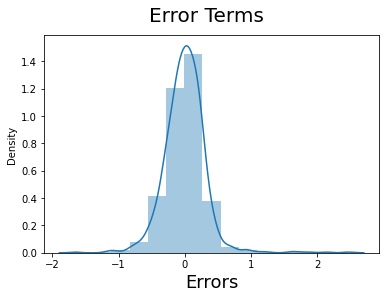

In [91]:
# Plot the histogram of the error terms
res = y_train - y_train_pred

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

##### Making Predictions Using the Final Model

In [92]:
# Adding constant variable to test dataframe
X_test_new = X_test[X.columns]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [93]:
# Calculating the y_test_red from the X_test variables of the final model
y_pred = lm.predict(X_test_new)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
y_pred_train = lm.predict(X_train_lm_2)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train RSS',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test RSS',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE',mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 0.9024621619205162
Test R2 0.8307777768287836
Train RSS 98.70829213643762
Test RSS 78.35640379783834
Train MSE 0.09753783807948381
Test MSE 0.1805447092116091


In [96]:
r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2',r2_test_lr)

Test R2 0.8307777768287836


In [97]:
r2_score(y_test, y_pred_test)

0.8307777768287836

In [98]:
X_train_lm_2=X_train_lm_2.drop('const', axis=1)
X_test_new=X_test_new.drop('const', axis=1)

Text(0, 0.5, 'Predicted Test Points')

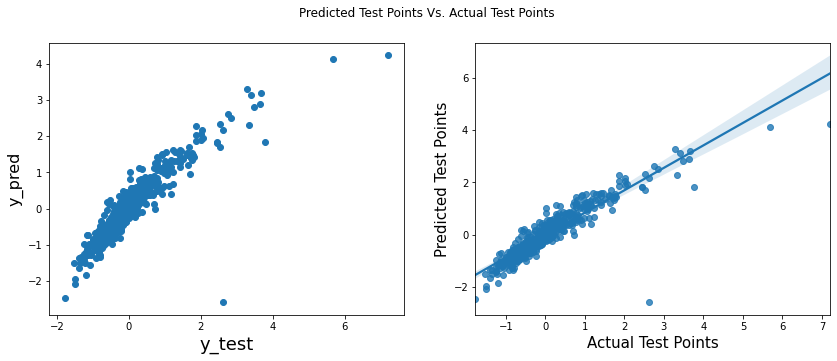

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

plt.subplot(1,2,2)
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.suptitle('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})

Text(0, 0.5, 'y_train_pred')

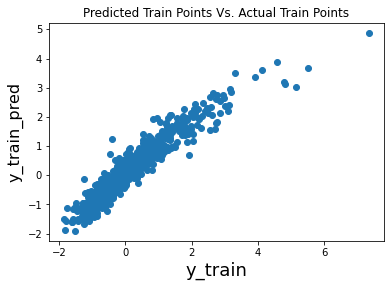

In [100]:
# Plotting y_train and y_train_pred to understand the spread.

plt.title('Predicted Train Points Vs. Actual Train Points')             
plt.scatter(y_train,y_train_pred)          
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)

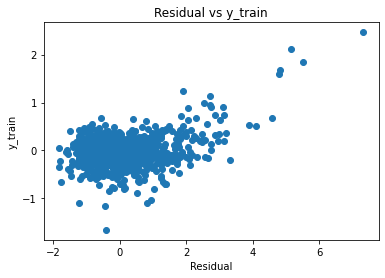

In [101]:
#plotting the scatter plot for residuals for training the dataset
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.title("Residual vs y_train")
plt.show()

## Ridge Regression

In [102]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm_2, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [104]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm_2, y_train)
print(ridge.coef_)

[ 0.08137679  0.16828909  0.0596616   0.09180708  0.09154646  0.06704449
  0.16011629  0.05166891  0.31607357  0.30387579 -0.01894813 -0.05472717
  0.07429253 -0.12254682  0.05731076  0.05434727  0.09342394  0.08900887
 -0.16168495 -0.04106572 -0.04920515  0.06054712  0.04025354  0.04208337
  0.10907964  0.05001304]


In [105]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004788,0.000747,0.002991,7.478899e-07,0.0001,{'alpha': 0.0001},-0.231186,-0.230062,-0.227256,-0.222976,-0.256438,-0.233583,0.011773,26,-0.220590,-0.216198,-0.212623,-0.220823,-0.222305,-0.218508,0.003580
1,0.005984,0.001668,0.004589,2.327035e-03,0.0010,{'alpha': 0.001},-0.231186,-0.230062,-0.227256,-0.222976,-0.256437,-0.233583,0.011773,25,-0.220590,-0.216198,-0.212623,-0.220823,-0.222305,-0.218508,0.003580
2,0.003191,0.000746,0.002194,7.461620e-04,0.0100,{'alpha': 0.01},-0.231186,-0.230060,-0.227254,-0.222975,-0.256435,-0.233582,0.011772,24,-0.220589,-0.216197,-0.212622,-0.220822,-0.222304,-0.218507,0.003580
3,0.004986,0.000631,0.002394,7.985115e-04,0.0500,{'alpha': 0.05},-0.231183,-0.230055,-0.227249,-0.222971,-0.256423,-0.233576,0.011769,23,-0.220584,-0.216191,-0.212619,-0.220817,-0.222298,-0.218502,0.003579
4,0.004786,0.001164,0.003192,3.997812e-04,0.1000,{'alpha': 0.1},-0.231180,-0.230048,-0.227242,-0.222966,-0.256408,-0.233569,0.011766,22,-0.220577,-0.216184,-0.212616,-0.220811,-0.222290,-0.218496,0.003578


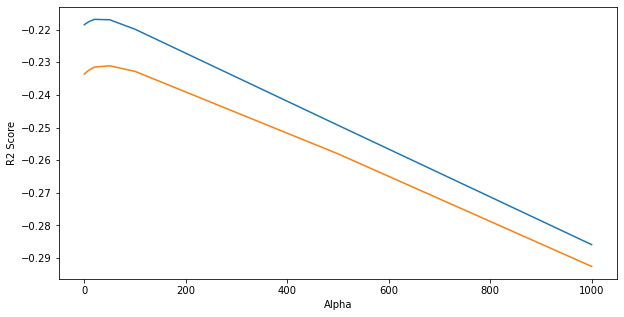

In [106]:
plt.figure(figsize=(10,5))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
#plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_lm_2)
y_pred_test = ridge.predict(X_test_new)

#y_pred_train = lm.predict(X_train_lm_2)
#y_pred_test = lm.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9004929737388832
0.8397738088280091
100.70111057625029
74.19089466611878
0.09950702626111689
0.1709467619034995


Text(0, 0.5, 'Predicted Test Points')

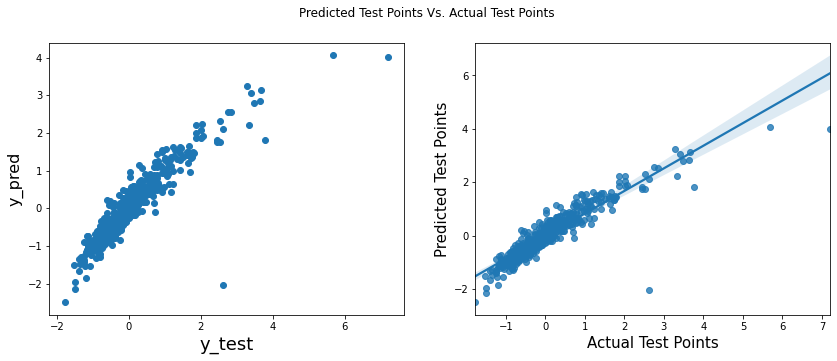

In [108]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred_test)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

plt.subplot(1,2,2)
corr_plot = sns.regplot(x=y_test, y=y_pred_test)
plt.suptitle('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})

Text(0, 0.5, 'y_train_pred')

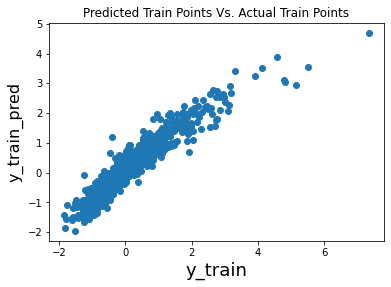

In [109]:
# Plotting y_train and y_train_pred to understand the spread.

plt.title('Predicted Train Points Vs. Actual Train Points')             
plt.scatter(y_train,y_pred_train)          
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)

## Lasso

In [110]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm_2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [112]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm_2, y_train) 

Lasso(alpha=0.01)

In [113]:
lasso.coef_

array([ 0.07379846,  0.17593273,  0.05265557,  0.07215379,  0.09162076,
        0.06170827,  0.13773534,  0.02138066,  0.35570799,  0.31819644,
       -0.0139677 , -0.05703788,  0.0683489 , -0.11286606,  0.04575154,
        0.04433382,  0.08929204,  0.08158611, -0.1596073 , -0.03198958,
       -0.03596022,  0.0359116 ,  0.02790781,  0.04189553,  0.10062408,
        0.03470844])

In [114]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005186,0.000398,0.003391,0.001017,0.0001,{'alpha': 0.0001},-0.231100,-0.230031,-0.227207,-0.222923,-0.256370,-0.233526,0.011767,3,-0.220532,-0.216140,-0.212586,-0.220770,-0.222239,-0.218453,0.003572
1,0.005784,0.000747,0.004590,0.001623,0.0010,{'alpha': 0.001},-0.230297,-0.229749,-0.226710,-0.222411,-0.255744,-0.232982,0.011720,2,-0.219987,-0.215637,-0.212270,-0.220249,-0.221629,-0.217954,0.003481
2,0.004586,0.000487,0.002993,0.000001,0.0100,{'alpha': 0.01},-0.227163,-0.228558,-0.231139,-0.220379,-0.251776,-0.231803,0.010601,1,-0.218287,-0.214417,-0.213496,-0.218568,-0.220262,-0.217006,0.002596
3,0.004787,0.000747,0.003191,0.000747,0.0500,{'alpha': 0.05},-0.257654,-0.246139,-0.279427,-0.254290,-0.275820,-0.262666,0.012825,4,-0.250822,-0.251304,-0.248132,-0.254170,-0.250543,-0.250994,0.001929
4,0.004588,0.000489,0.003192,0.000400,0.1000,{'alpha': 0.1},-0.297331,-0.292715,-0.330289,-0.291200,-0.291241,-0.300555,0.015035,5,-0.287803,-0.298189,-0.291433,-0.291322,-0.282460,-0.290241,0.005143


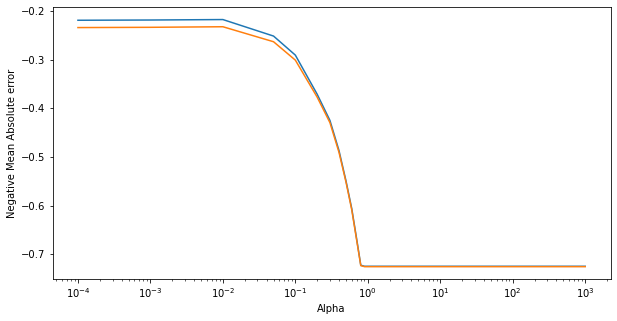

In [115]:
plt.figure(figsize=(10,5))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute error')
plt.xlabel('Alpha')
plt.show()

In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lm_2)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8988669923122546
0.8398652611202118
102.34660377999825
74.14854873423242
0.1011330076877453
0.17084919063187193


**Lasso Model Evaluation**

Text(0, 0.5, 'Predicted Test Points')

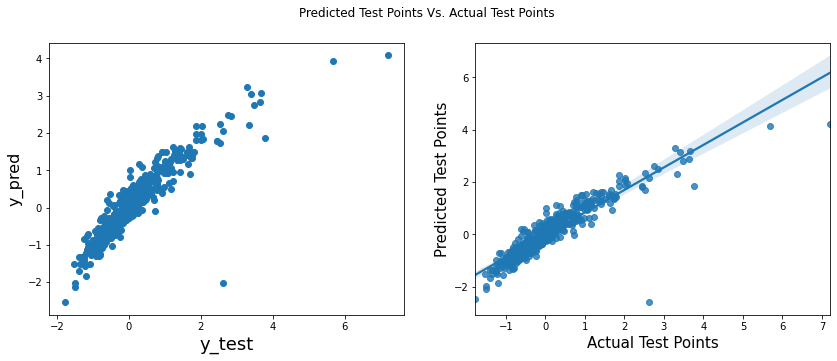

In [117]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred_test)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

plt.subplot(1,2,2)
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.suptitle('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})

Text(0, 0.5, 'y_train_pred')

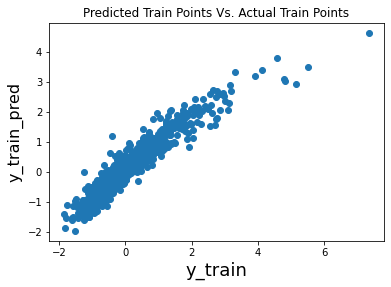

In [118]:
# Plotting y_train and y_train_pred to understand the spread.

plt.title('Predicted Train Points Vs. Actual Train Points')             
plt.scatter(y_train,y_pred_train)          
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)

In [119]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.902462,0.900493,0.898867
1,R2 Score (Test),0.830778,0.839774,0.839865
2,RSS (Train),98.708292,100.701111,102.346604
3,RSS (Test),78.356404,74.190895,74.148549
4,MSE (Train),0.312310,0.315447,0.318014
5,MSE (Test),0.424906,0.413457,0.413339


## Lets observe the changes in the coefficients after regularization

In [120]:
betas = pd.DataFrame(index=X_train_lm_2.columns)

In [121]:
betas.rows =X_train_lm_2.columns

In [122]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [123]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
LotArea,0.374062,0.081377,0.073798
OverallQual,0.144407,0.168289,0.175933
OverallCond,0.166416,0.059662,0.052656
MasVnrArea,0.055061,0.091807,0.072154
ExterQual,0.083091,0.091546,0.091621
BsmtExposure,0.362683,0.067044,0.061708
BsmtFinSF1,-0.140568,0.160116,0.137735
BsmtUnfSF,0.057425,0.051669,0.021381
1stFlrSF,0.074070,0.316074,0.355708
2ndFlrSF,0.091334,0.303876,0.318196


#### Multicollinearity

In [124]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
8,1stFlrSF,3.78
1,OverallQual,3.60
6,BsmtFinSF1,3.14
7,BsmtUnfSF,3.09
4,ExterQual,2.95
9,2ndFlrSF,2.77
13,YearBuilt_Old,2.55
12,KitchenQual,2.38
21,MasVnrType_None,2.30
3,MasVnrArea,2.28


## Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will 
be the most important predictor variables after the change is implemented?

`ANS` - optimal value of alpha

Ridge = 50.0

Lasso = 0.01

In [125]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 100.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm_2, y_train)
print(ridge.coef_)

[ 0.08620363  0.17869368  0.05393225  0.09067868  0.09772825  0.06741229
  0.15298216  0.04839922  0.28042461  0.26654255 -0.00116729 -0.04894184
  0.0850377  -0.11195972  0.05791019  0.05904264  0.0919705   0.08841006
 -0.14757692 -0.03978014 -0.04594773  0.04922446  0.0379144   0.03684839
  0.10224281  0.04345561]


In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Ridge')

y_pred_train = ridge.predict(X_train_lm_2)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Train",mse_test_lr)

Ridge
R2 Train 0.8968479418859328
R2 Test 0.8438121408034247
RSS Train 104.38988281143608
RSS Test 72.32099149970531
MSE Train 0.10315205811406727
MSE Train 0.16663822926199381


In [127]:
ridgedf = pd.DataFrame(index=X_train_lm_2.columns)
ridgedf.rows =X_train_lm_2.columns
ridgedf['Ridge']=betas['Ridge']
ridgedf['Ridge after doubling alpha'] = ridge.coef_

ridgedf.sort_values(by=['Ridge after doubling alpha'], ascending=False)

,Ridge,Ridge after doubling alpha
1stFlrSF,0.316074,0.280425
2ndFlrSF,0.303876,0.266543
OverallQual,0.168289,0.178694
BsmtFinSF1,0.160116,0.152982
SaleType_New,0.109080,0.102243
ExterQual,0.091546,0.097728
Neighborhood_NridgHt,0.093424,0.091970
MasVnrArea,0.091807,0.090679
Neighborhood_StoneBr,0.089009,0.088410
LotArea,0.081377,0.086204


In [128]:
#Fitting Lasso model for alpha = 0.02 and printing coefficients which have been penalised

alpha = 0.02

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lm_2, y_train)
print(lasso.coef_)

[ 0.07543621  0.20398012  0.03829233  0.05304684  0.0973594   0.05620963
  0.11692306  0.          0.3407172   0.28756216 -0.         -0.04789316
  0.07589444 -0.08783734  0.0357375   0.04102405  0.0826926   0.07265911
 -0.14115951 -0.02215555 -0.02195373  0.          0.01210965  0.03229584
  0.08265845  0.01106642]


In [129]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
print('Lasso')
y_pred_train = lasso.predict(X_train_lm_2)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Train",mse_test_lr)

Lasso
R2 Train 0.8899711032442558
R2 Test 0.8436188522850248
RSS Train 111.34924351681316
RSS Test 72.41049152466303
MSE Train 0.11002889675574423
MSE Train 0.16684445051765676


In [130]:
Lassodf = pd.DataFrame(index=X_train_lm_2.columns)
Lassodf.rows =X_train_lm_2.columns
Lassodf['Lasso']=betas['Lasso']
Lassodf['Lasso after doubling alpha'] = lasso.coef_

Lassodf.sort_values(by=['Lasso after doubling alpha'], ascending=False)

,Lasso,Lasso after doubling alpha
1stFlrSF,0.355708,0.340717
2ndFlrSF,0.318196,0.287562
OverallQual,0.175933,0.203980
BsmtFinSF1,0.137735,0.116923
ExterQual,0.091621,0.097359
Neighborhood_NridgHt,0.089292,0.082693
SaleType_New,0.100624,0.082658
KitchenQual,0.068349,0.075894
LotArea,0.073798,0.075436
Neighborhood_StoneBr,0.081586,0.072659


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [131]:
Lassodf = pd.DataFrame(index=X_train_lm_2.columns)
Lassodf.rows =X_train_lm_2.columns
Lassodf['Lasso']=betas['Lasso']

Lassodf.sort_values(by=['Lasso'], ascending=False).head(50)

,Lasso
1stFlrSF,0.355708
2ndFlrSF,0.318196
OverallQual,0.175933
BsmtFinSF1,0.137735
SaleType_New,0.100624
ExterQual,0.091621
Neighborhood_NridgHt,0.089292
Neighborhood_StoneBr,0.081586
LotArea,0.073798
MasVnrArea,0.072154


In [132]:
#Drop 5 top features
X_train_lm_2 = X_train_lm_2.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'SaleType_New'], axis=1)
X_test_new = X_test_new.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'SaleType_New'], axis=1)

In [133]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm_2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [135]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm_2, y_train) 

Lasso(alpha=0.01)

In [136]:
lasso.coef_

array([ 0.173077  ,  0.05684334,  0.1693653 ,  0.23763703,  0.1057464 ,
        0.00856575,  0.14514843, -0.01652422,  0.22513362, -0.1629309 ,
        0.10463616,  0.11845599,  0.14022682,  0.14309135, -0.08964878,
       -0.04834177, -0.03647894,  0.03109706,  0.04375663,  0.00934713,
       -0.        ])

In [137]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006383,0.002326,0.003390,4.896503e-04,0.0001,{'alpha': 0.0001},-0.372514,-0.357905,-0.365813,-0.356258,-0.342301,-0.358958,0.010165,3,-0.338579,-0.338365,-0.332165,-0.343508,-0.349430,-0.340410,0.005770
1,0.004389,0.000489,0.002992,3.162980e-07,0.0010,{'alpha': 0.001},-0.371706,-0.357398,-0.365611,-0.356138,-0.341844,-0.358539,0.010091,2,-0.338363,-0.338020,-0.332008,-0.343308,-0.349300,-0.340200,0.005791
2,0.004787,0.000400,0.003191,3.987793e-04,0.0100,{'alpha': 0.01},-0.364372,-0.353151,-0.366383,-0.359591,-0.338007,-0.356301,0.010220,1,-0.337310,-0.336771,-0.332588,-0.343160,-0.349009,-0.339768,0.005718
3,0.008377,0.007290,0.003192,3.988030e-04,0.0500,{'alpha': 0.05},-0.358870,-0.352772,-0.385337,-0.389852,-0.358463,-0.369059,0.015354,4,-0.355520,-0.355686,-0.352296,-0.361797,-0.363910,-0.357842,0.004319
4,0.005186,0.001934,0.003391,4.880348e-04,0.1000,{'alpha': 0.1},-0.383727,-0.356438,-0.437828,-0.412947,-0.389142,-0.396017,0.027567,5,-0.389219,-0.388041,-0.383543,-0.389196,-0.386562,-0.387312,0.002121


In [138]:
y_pred_train = lasso.predict(X_train_lm_2)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7682008204870552
0.7234649726514422


In [139]:
Lassodf = pd.DataFrame(index=X_train_lm_2.columns)
Lassodf.rows =X_train_lm_2.columns
#Lassodf['Lasso']=betas['Lasso']
Lassodf['Lasso after removing 5 imp vars'] = lasso.coef_

Lassodf.sort_values(by=['Lasso after removing 5 imp vars'], ascending=False).head(5)

,Lasso after removing 5 imp vars
ExterQual,0.237637
KitchenQual,0.225134
LotArea,0.173077
MasVnrArea,0.169365
BedroomAbvGr,0.145148


## Conclussion

- After creating model in both Ridge and Lasso we can see that the R2 scores are almost same, slightly lower for Lasso; lasso will penalize more on the dataset and can also help in feature elemination so we can to consider lasso model for regression.

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- **1stFlrSF,2ndFlrSF,OverallQual,BsmtFinSF1,ExterQual,Neighborhood_NridgHt,SaleType_New** are some important feature that can be considered


- __The optimal value of lambda for ridge and lasso regression are :__

    - Best alpha value for Lasso : 0.01

    - Best alpha value for Ridge : 50.0